In [9]:
%run MonteCarlo.ipynb
da = DataAnalysis()

In [19]:
mc = MonteCarlo(10000, "sasso")
#mc = DataAnalysis()
#mc.load_eventdf('data/path/MC_events.csv')
#mc.load_clusterdf('data/mc_clusters1.csv')
mc.filter_fit(3.5, 5) #(NRMSE, channels)
#mc.clusterdf = mc.clusterdf[mc.clusterdf['Channels'] >= 5]
len(mc.get_clusterdf())

7263

In [20]:
data = DataAnalysis()
data.load_eventdf('data/new_moo/8-5/events.csv')
data.load_clusterdf('data/new_moo/8-5/clusters.csv')
data.filter_fit(3.5, 5) #(NRMSE, channels)
len(data.get_clusterdf())

df = [da.azimuth(line) for line in data.get_clusterdf()['Fitline']]
data.clusterdf['Azimuth'] = df

df = data.get_clusterdf()['Azimuth'].values * 180 / np.pi - 100
df += (df < -90 ) * 180
data.clusterdf['Azimuth'] = df * np.pi/180

#data.get_clusterdf()

(-100.0, 100.0)

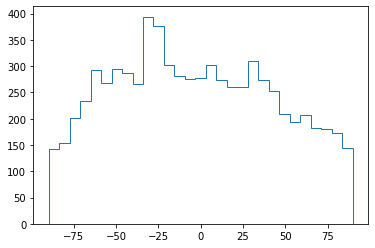

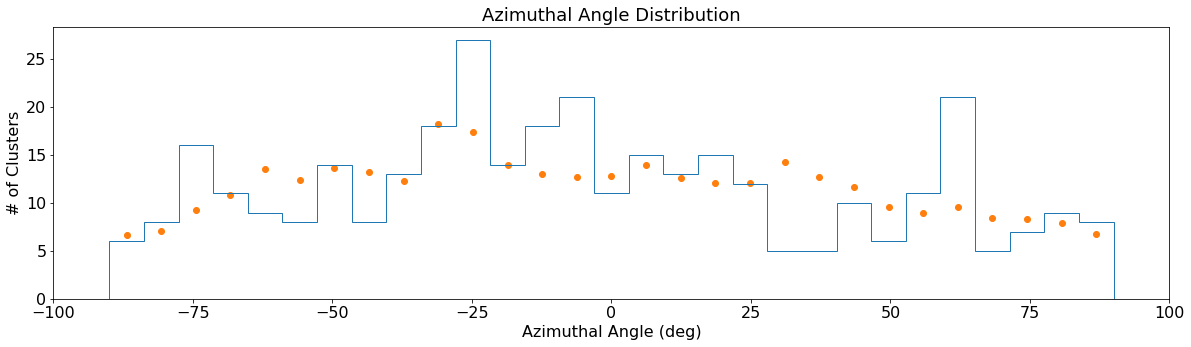

In [21]:
#### plt.figure()
array1=plt.hist([phi*180/np.pi for phi in mc.get_clusterdf()['Azimuth']], np.linspace(-90, 90,30), histtype='step')
#array=plt.hist([da.azimuth(line)*180/np.pi for line in mc.get_clusterdf()['Fitline']], np.linspace(-90, 90,40), histtype='step')


plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

array2=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], np.linspace(-90,90,30), histtype='step')
#plt.hist([da.azimuth(line)*180/np.pi for line in data.get_clusterdf()['Fitline']], np.linspace(-90,90,40), histtype='step')



bounds = np.array([(array1[1][i] + array1[1][i+1])/2  for i in range(len(array1[1]) - 1)])
plt.scatter(bounds, array1[0] * 336 / len(mc.get_clusterdf()))

plt.xlim(-100,100)

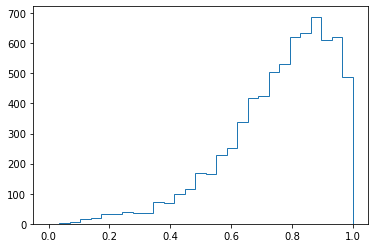

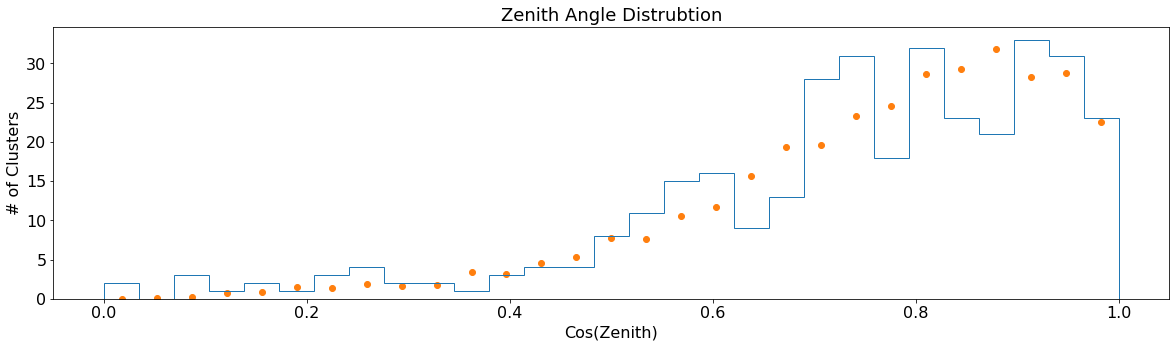

In [22]:
array = plt.hist([math.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1,30), histtype='step')

plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1,30), histtype='step')

bounds = [(array[1][i] + array[1][i+1])/2  for i in range(len(array[1]) - 1)]
plt.scatter(bounds, array[0] * 336 / len(mc.get_clusterdf()))

In [225]:
mc.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
1,1,9,9,1.243708e+04,0.0,0.979339,0.734245,0.740807,0,0,419.463477,1.0,"[-51.40957, -340.584515, -4.964437, -0.13146, ..."
2,2,7,7,3.448664e+04,0.0,0.925219,0.357171,1.312512,0,0,931.884304,1.0,"[-77.949688, -165.147189, 190.208033, 0.127805..."
3,3,5,5,7.921122e+04,0.0,1.037455,0.646378,0.742647,0,0,48.502024,1.0,"[273.543131, -120.698345, -241.73582, -0.11708..."
4,4,6,6,9.364365e+04,0.0,1.004027,0.447737,-1.049650,0,0,170.613672,1.0,"[-99.11493, 212.087509, -244.15407, -0.395803,..."
5,5,9,9,1.222394e+05,0.0,0.995934,0.808936,-1.565099,0,0,416.764836,1.0,"[142.415787, 85.431861, -182.070485, 0.43106, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,9088,5,5,1.103807e+08,0.0,1.103829,0.955031,-0.000569,0,0,990.326557,1.0,"[71.434406, -274.275199, -308.644069, -0.65868..."
9089,9089,11,11,1.103847e+08,0.0,1.005420,0.431368,0.187232,0,0,291.237739,1.0,"[-181.327728, 39.95702, -11.938327, -0.285326,..."
9090,9090,10,10,1.103878e+08,0.0,0.893774,0.590272,-0.275593,0,0,695.388962,1.0,"[2.701914, -239.460704, 167.328615, -0.52151, ..."
9091,9091,6,6,1.103908e+08,0.0,1.081823,0.849496,-0.044048,0,0,804.547999,1.0,"[-201.437812, 11.520706, -276.347914, -0.62463..."


In [322]:
%run new_DataAnalysis.ipynb
da1 = testDataAnalysis()
da1.set_eventdf(mc.get_cluster(1))
da1.set_clusterdf(mc.get_clusterdf()[mc.get_clusterdf()['Cluster'] == 1])

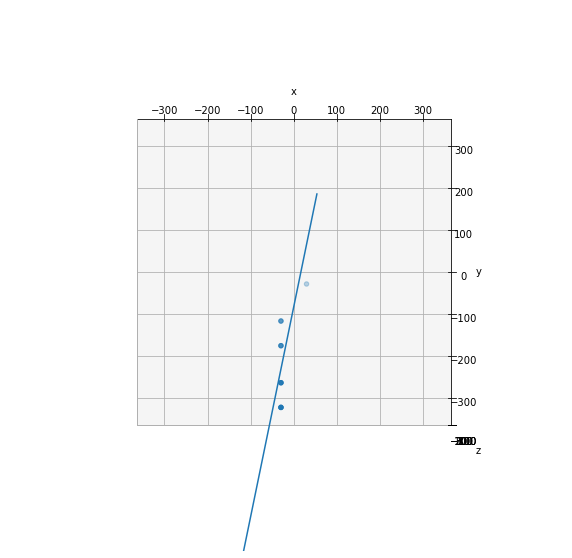

[-5.14095700e+01 -3.40584515e+02 -4.96443700e+00 -1.31460000e-01
 -6.57004000e-01  7.42337000e-01]
[[  53.75843   185.018685 -598.834037]
 [-156.57757  -866.187715  588.905163]]
1051.2064
210.33599999999996


78.68510348383892

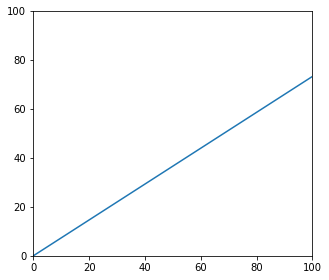

In [323]:
da1.show_cluster(1, 90,-90)
plt.figure(figsize=(5,4.5))
plt.plot(np.linspace(0,300), np.linspace(0,300) * np.tan(36.24 * np.pi/180))
plt.xlim(0,100)
plt.ylim(0,100)

line = da1.get_clusterdf()['Fitline'].values[0]
print(line)
print(da1.line_to_pts(line))
da1.azimuth(line) * 180 / np.pi

[ 598.382406 -455.513594] [ 111.496801 -660.047199] [-770.710469  153.422331]


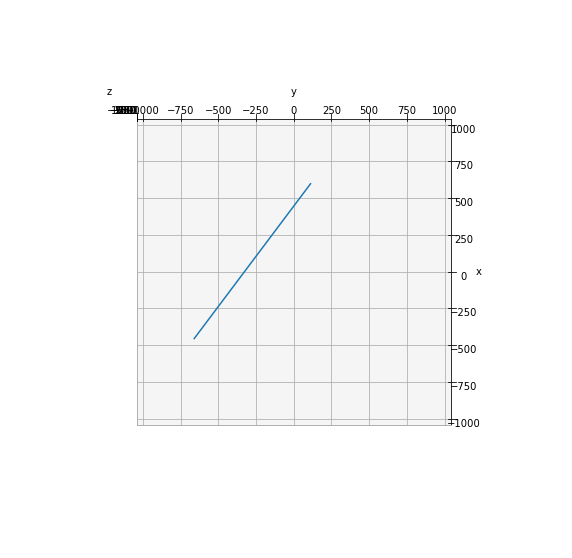

In [313]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

#line = self.clusterdf[self.clusterdf['Cluster'] == c]['Fitline'].values[0]
#linepts = self.line_to_pts(line)

linepts = np.array([[ 598.382406  ,111.496801 ,-770.710469],
 [-455.513594, -660.047199 , 153.422331]])
print(*linepts.T)

ax.plot3D(*linepts.T)
#ax.scatter3D(*linepts.T)

plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
ax.set_zlim([-1000,1000])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(-90, 0)